<a href="https://colab.research.google.com/github/saswatisamal/PythonWithGenAI/blob/main/ANNVsCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
mnist_data=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist_data.load_data()
x_train=x_train.reshape(x_train.shape[0],28,28,1)/255.0
x_test=x_test.reshape(x_test.shape[0],28,28,1)/255.0
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])





32


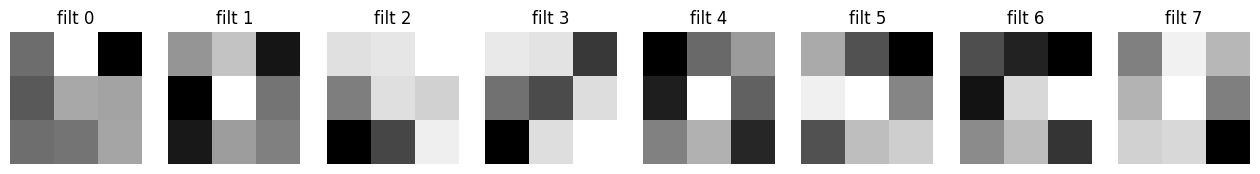

In [8]:
import matplotlib.pyplot as plt

kernel, bias = model.layers[0].get_weights()  # first Conv2D
# kernel.shape == (kernel_h, kernel_w, in_ch, out_ch)

kh, kw, in_ch, out_ch = kernel.shape
print (out_ch)

n = min(8, out_ch)  # show up to 8 filters
fig, axes = plt.subplots(1, n, figsize=(n*2, 2))
for i in range(n):
    # if single input channel, kernel[:, :, 0, i] is 2D image of the filter
    filt = kernel[:, :, 0, i]
    axes[i].imshow(filt, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"filt {i}")
plt.show()

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9991 - loss: 0.0026
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9993 - loss: 0.0020
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9990 - loss: 0.0028
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9989 - loss: 0.0035
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9992 - loss: 0.0025
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9901 - loss: 0.0596
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
y_original: 7,y_predicted:7


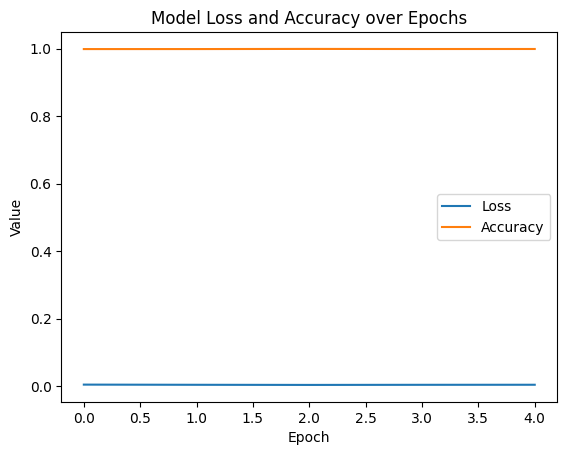

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

In [7]:

history=model.fit(x_train,y_train,epochs=5)
test_loss,test_accurracy=model.evaluate(x_test,y_test)

prediction=model.predict(x_test)
print(f'y_original: {y_test[0]},y_predicted:{np.argmax(prediction[0])}')

#plot the loss, accuracy vs no of epochs
# Plot the loss and accuracy vs number of epochs
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.title('Model Loss and Accuracy over Epochs')
plt.show()

model.summary()




In [ ]:
#Calculating the learnable parameters
#Convo2D: 32*9+32=320 : Feature map size : 26*26
#MaxPooling : 0     : Feature map size : 13*13
#Convo2D:32*9+64+64 =18496  : Feature map size : 11*11
#MaxPooling : 0  : Feature map size : 5*5
#Flatten : 0 : 5*5*64. =1600
#Dense :  1600*64+64 102464
#Output-Dense : 10*64+10 =650

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8809 - loss: 0.4262
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9637 - loss: 0.1217
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9752 - loss: 0.0809
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9839 - loss: 0.0525
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9868 - loss: 0.0433
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9745 - loss: 0.0838
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
y_original: 7,y_predicted:7


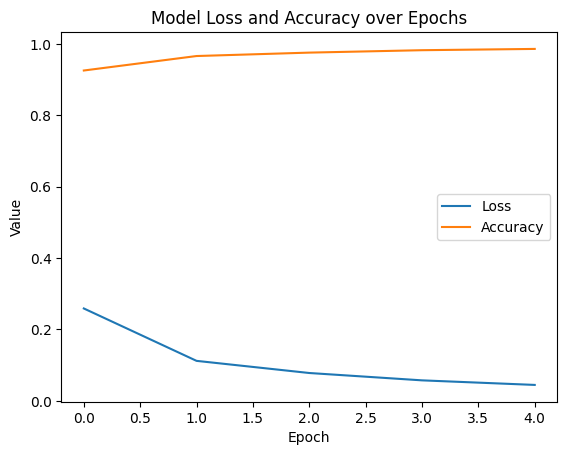

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
mnist_data=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist_data.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model=models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=5)

test_loss,test_accurracy=model.evaluate(x_test,y_test)

prediction=model.predict(x_test)
print(f'y_original: {y_test[0]},y_predicted:{np.argmax(prediction[0])}')

#plot the loss, accuracy vs no of epochs
# Plot the loss and accuracy vs number of epochs
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.title('Model Loss and Accuracy over Epochs')
plt.show()








313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9719 - loss: 0.0892
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
y_original: 7,y_predicted:7


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [ ]:
#Calculating the learnable parameters
#Flatten : 0
#Dense-1 : 128*28*28+128=100480
#Output : 10*128+10=1290